In [25]:
# Pandas - Data manipulation and analysis library
import pandas as pd
# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

from scipy import stats

import seaborn as sns
# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Scikit-learn algorithms and functions
from sklearn.neighbors import KNeighborsClassifier # Scikit-learn KNeighbors Classifier
from sklearn.tree import DecisionTreeClassifier # Scikit-learn Decision Tree Classifier
from sklearn.model_selection import KFold # Scikit-learn K-Folds cross-validator
from sklearn.model_selection import cross_val_score # evaluating cross-validator performance
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # KFold configuration

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# Display Matplotlib output inline
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [197]:
df_train.head(10)

deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
0     28647                    5.12                   41.11   
1     36175                   36.60                    5.16   
2     16107                    5.51                    5.04   
3     27362                    4.66                   39.85   
4     19463                    5.10                   43.24   
5     30054                   27.74                    5.12   
6     26431                    4.67                    5.32   
7      5491                   11.49                    7.10   
8     43953                   35.88                   46.05   
9     45081                    4.80                   41.35   

   avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
0                    6.56                   25.39            0.086667   
1                    6.23                    6.96            0.136667   
2                    4.52                    5.96           -0.460000   
3                   35.76                   40.69            0.076667   
4                    4.63                    5.26            0.040000   
5                   42.39                    5.46            0.076667   
6                   23.99                    4.62            0.270000   
7                   18.48                     NaN           -0.650000   
8                    5.43                    4.77            0.830000   
9                    6.09                   27.60           -0.003333   

   charging_rate_lag7  avg_time_discharging_lag1  avg_time_discharging_lag2  \
0           -0.006667                       4.37                      91.70   
1           -1.296667                      62.67                       6.53   
2           -0.083333                       5.13                       5.65   
3           -0.006667                       3.93                      76.37   
4           -0.153333                       4.69                      71.44   
5           -0.020000                      45.90                       3.99   
6           -0.010000                       3.56                       4.62   
7            0.063333                      18.21                      10.88   
8           -2.486667                      47.08                      85.63   
9            0.000000                       3.41                      75.23   

   avg_time_discharging_lag3  ...  number_times_restart  \
0                      15.70  ...              2.375000   
1                       6.16  ...              1.000000   
2                       4.14  ...              4.095238   
3                      60.86  ...              0.736842   
4                       3.80  ...              1.133333   
5                      75.64  ...              2.150000   
6                      18.57  ...              1.956522   
7                      23.40  ...              0.428571   
8                       6.50  ...              0.785714   
9                       8.67  ...              2.666667   

   avg_volt_change_charging  avg_volt_change_discharging  avg_time_charging  \
0                377.080000                   367.428750          21.696250   
1                350.517857                   350.309286          19.883571   
2                346.113333                   343.409524          13.675238   
3                356.184211                   349.844737          16.306842   
4                370.904000                   367.730000          18.797333   
5                350.345500                   346.747500          12.878500   
6                358.789130                   353.025652          17.384783   
7                345.727143                   342.172857          19.920000   
8                330.151429                   332.997857          18.780714   
9                356.720952                   348.738571          16.782381   

   avg_time_discharging  max_voltage_day  piececount  cycle_time  LastRecord  \
0             39.005000      4174.8

In [135]:
df_train.describe()

avg_time_charging_lag1  avg_time_charging_lag2  avg_time_charging_lag3  \
count            40500.000000            40500.000000            40500.000000   
mean                16.274839               16.521473               16.277490   
std                 15.374342               15.425769               15.305041   
min                  1.510000                1.060000                0.040000   
25%                  4.910000                4.920000                4.900000   
50%                  5.770000                5.830000                5.780000   
75%                 30.100000               30.730000               30.060000   
max                 82.550000               98.890000               81.000000   

       avg_time_charging_lag7  charging_rate_lag3  charging_rate_lag7  \
count            40434.000000        40500.000000        40488.000000   
mean                16.355088           -0.043389           -0.053017   
std                 15.137390            0.776305            0.756558   
min                  1.070000          -76.946667          -42.130000   
25%                  4.900000           -0.066667           -0.100000   
50%                  5.780000            0.000000           -0.003333   
75%                 29.600000            0.046667            0.060000   
max                 81.890000            9.556667           17.913333   

       avg_time_discharging_lag1  avg_time_discharging_lag2  \
count               40500.000000               40500.000000   
mean                   25.800928                  26.353566   
std                    29.243961                  29.459305   
min                     0.520000                   0.700000   
25%                     4.200000                   4.210000   
50%                     5.860000                   5.920000   
75%                    50.200000                  51.212500   
max                   104.550000                 110.560000   

       avg_time_discharging_lag3  avg_time_discharging_lag7  ...  \
count               40500.000000               40434.000000  ...   
mean                   25.903624                  26.081209  ...   
std                    29.269789                  28.996887  ...   
min                     1.070000                   1.740000  ...   
25%                     4.200000                   4.200000  ...   
50%                     5.850000                   5.890000  ...   
75%                    50.300000                  49.680000  ...   
max                   108.170000                 104.810000  ...   

       dischargecycles  total_off_time  number_times_restart  \
count     40500.000000    40500.000000          40500.000000   
mean         84.859009       25.258990              2.154864   
std          15.507518       37.037053              2.223237   
min          14.416667        0.000000              0.090909   
25%          74.500000        3.565217              1.052632   
50%          84.875000       17.097619              1.470588   
75%          95.200000       37.000000              2.353416   
max         145.333333     2013.000000             38.000000   

       avg_volt_change_charging  avg_volt_change_discharging  \
count              40500.000000                 40500.000000   
mean                 351.421779                   348.207773   
std                   12.745409                    13.277782   
min                  304.050833                   298.250000   
25%                  342.770532                   339.267541   
50%                  351.109967                   347.911440   
75%                  359.687861                   356.837450   
max                  410.957692                   420.486000   

       avg_time_charging  avg_time_discharging  max_voltage_day    piececount  \
count       40500.000000          40500.000000     40500.000000  40500.000000   
mean           16.352522             26.081939      4159.266095     20.526154   
std             3.553653              6.8

In [125]:
print(df_train['avg_time_charging_lag7'].mean())
print(df_train['avg_time_charging_lag7'].median())
print('=================')
print(df_train['charging_rate_lag7'].mean())
print(df_train['charging_rate_lag7'].median())

16.35508829203152
5.78
-0.05301719027976213
-0.003333333


In [6]:
df_train.shape

(40500, 55)

In [7]:
df_test.shape

(4500, 54)

In [3]:
df_train.isnull().sum()

deviceid                          0
avg_time_charging_lag1            0
avg_time_charging_lag2            0
avg_time_charging_lag3            0
avg_time_charging_lag7           66
charging_rate_lag3                0
charging_rate_lag7               12
avg_time_discharging_lag1         0
avg_time_discharging_lag2         0
avg_time_discharging_lag3         0
avg_time_discharging_lag7        66
discharging_rate_lag3             0
discharging_rate_lag7            12
fail_7                            0
charge_cycle_time_below_12        0
avg_time_charging_lag4            0
avg_time_discharging_lag4         0
avg_time_charging_lag5            7
avg_time_discharging_lag5         7
avg_time_charging_lag6           28
avg_time_discharging_lag6        28
avg_time_charging_lag8          162
avg_time_discharging_lag8       162
avg_time_charging_lag9          374
avg_time_discharging_lag9       374
avg_time_charging_lag10         797
avg_time_discharging_lag10      797
avg_time_charging_lag11     

In [7]:
df_train.isnull().sum()/df_train.shape[0]*100
#avg_charge/discharge_time_lag_13/14 >10% missing values

deviceid                        0.000000
avg_time_charging_lag1          0.000000
avg_time_charging_lag2          0.000000
avg_time_charging_lag3          0.000000
avg_time_charging_lag7          0.162963
charging_rate_lag3              0.000000
charging_rate_lag7              0.029630
avg_time_discharging_lag1       0.000000
avg_time_discharging_lag2       0.000000
avg_time_discharging_lag3       0.000000
avg_time_discharging_lag7       0.162963
discharging_rate_lag3           0.000000
discharging_rate_lag7           0.029630
fail_7                          0.000000
charge_cycle_time_below_12      0.000000
avg_time_charging_lag4          0.000000
avg_time_discharging_lag4       0.000000
avg_time_charging_lag5          0.017284
avg_time_discharging_lag5       0.017284
avg_time_charging_lag6          0.069136
avg_time_discharging_lag6       0.069136
avg_time_charging_lag8          0.400000
avg_time_discharging_lag8       0.400000
avg_time_charging_lag9          0.923457
avg_time_dischar

In [4]:
df_test.isnull().sum()

deviceid                         0
avg_time_charging_lag1           0
avg_time_charging_lag2           0
avg_time_charging_lag3           0
avg_time_charging_lag7           3
charging_rate_lag3               0
charging_rate_lag7               1
avg_time_discharging_lag1        0
avg_time_discharging_lag2        0
avg_time_discharging_lag3        0
avg_time_discharging_lag7        3
discharging_rate_lag3            0
discharging_rate_lag7            1
charge_cycle_time_below_12       0
avg_time_charging_lag4           0
avg_time_discharging_lag4        0
avg_time_charging_lag5           1
avg_time_discharging_lag5        1
avg_time_charging_lag6           2
avg_time_discharging_lag6        2
avg_time_charging_lag8          17
avg_time_discharging_lag8       17
avg_time_charging_lag9          43
avg_time_discharging_lag9       43
avg_time_charging_lag10        103
avg_time_discharging_lag10     103
avg_time_charging_lag11        182
avg_time_discharging_lag11     182
avg_time_charging_la

In [9]:
df_test.isnull().sum()/df_test.shape[0]*100

deviceid                        0.000000
avg_time_charging_lag1          0.000000
avg_time_charging_lag2          0.000000
avg_time_charging_lag3          0.000000
avg_time_charging_lag7          0.066667
charging_rate_lag3              0.000000
charging_rate_lag7              0.022222
avg_time_discharging_lag1       0.000000
avg_time_discharging_lag2       0.000000
avg_time_discharging_lag3       0.000000
avg_time_discharging_lag7       0.066667
discharging_rate_lag3           0.000000
discharging_rate_lag7           0.022222
charge_cycle_time_below_12      0.000000
avg_time_charging_lag4          0.000000
avg_time_discharging_lag4       0.000000
avg_time_charging_lag5          0.022222
avg_time_discharging_lag5       0.022222
avg_time_charging_lag6          0.044444
avg_time_discharging_lag6       0.044444
avg_time_charging_lag8          0.377778
avg_time_discharging_lag8       0.377778
avg_time_charging_lag9          0.955556
avg_time_discharging_lag9       0.955556
avg_time_chargin

In [10]:
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
df_train=df_train.dropna()
X_train=df_train.drop(['deviceid','LastRecord','Date Deployed','fail_7'],axis=1)
Y_train=df_train['fail_7']



In [21]:
gbdt = GradientBoostingClassifier(random_state=0)
gbdt.fit(X_train, Y_train)


RandomForestClassifier(random_state=0)

In [70]:
predictions_beforeKNN = gbdt.predict(X_train)

In [71]:
from sklearn.metrics import accuracy_score

print('accuracy traning:',accuracy_score(Y_train,predictions_beforeKNN))

accuracy traning: 0.8121009694963348


In [22]:
#function to plot feature imprtance
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

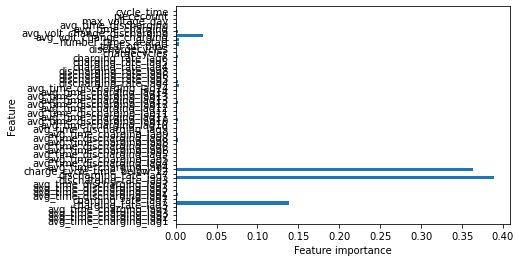

In [23]:
plot_feature_importances(gbdt)

In [27]:
#show all rows, default 10
pd.set_option('display.max_rows', None)
df_featureImportance=pd.DataFrame(gbdt.feature_importances_,index=X_train.columns,columns=['Importance Value'])

df_featureImportance.sort_values(by=['Importance Value'],ascending=False).head(10)

#the first 3 are the most important
#so we can see only aove 0.02 are significantly important, all the rest are equally important in 0.015-0.018

Importance Value
discharging_rate_lag3                0.389533
charge_cycle_time_below_12           0.362793
charging_rate_lag3                   0.138140
avg_volt_change_charging             0.032916
number_times_restart                 0.004450
total_off_time                       0.004304
avg_time_discharging_lag14           0.003785
discharging_rate_lag4                0.003460
avg_volt_change_discharging          0.003095
charging_rate_lag6                   0.002773

In [46]:
from sklearn.impute import KNNImputer

In [61]:
imputer=KNNImputer()

Xtrans=imputer.fit_transform(X_train)






0      1      2      3         4         5      6      7      8      9   \
0   5.51   5.04   4.52   5.96 -0.460000 -0.083333   5.13   5.65   4.14  14.02   
1   4.66  39.85  35.76  40.69  0.076667 -0.006667   3.93  76.37  60.86  73.53   
2   5.10  43.24   4.63   5.26  0.040000 -0.153333   4.69  71.44   3.80   6.29   
3  27.74   5.12  42.39   5.46  0.076667 -0.020000  45.90   3.99  75.64   4.36   
4   4.67   5.32  23.99   4.62  0.270000 -0.010000   3.56   4.62  18.57   3.74   

   ...          41         42        43          44          45         46  \
0  ...   80.333333   2.333333  4.095238  346.113333  343.409524  13.675238   
1  ...   91.684211  10.789474  0.736842  356.184211  349.844737  16.306842   
2  ...   70.733333  14.266667  1.133333  370.904000  367.730000  18.797333   
3  ...  100.550000  10.700000  2.150000  350.345500  346.747500  12.878500   
4  ...   71.869565  60.304348  1.956522  358.789130  353.025652  17.384783   

          47           48         49         50  
0  20.471429  4152.238095  19.200000  34.146667  
1  26.189474  4164.631579  23.625000  42.496316  
2  30.812000  4169.800000  12.666667  49.609333  
3  19.621000  4151.600000   6.375000  32.499500  
4  27.495217  4170.652174  20.500000  44.880000  

[5 rows x 51 columns]

In [64]:
names=X_train.columns

Xtrans_df=pd.DataFrame(Xtrans,columns=names)

Xtrans_df.isnull().sum()

avg_time_charging_lag1         0
avg_time_charging_lag2         0
avg_time_charging_lag3         0
avg_time_charging_lag7         0
charging_rate_lag3             0
charging_rate_lag7             0
avg_time_discharging_lag1      0
avg_time_discharging_lag2      0
avg_time_discharging_lag3      0
avg_time_discharging_lag7      0
discharging_rate_lag3          0
discharging_rate_lag7          0
charge_cycle_time_below_12     0
avg_time_charging_lag4         0
avg_time_discharging_lag4      0
avg_time_charging_lag5         0
avg_time_discharging_lag5      0
avg_time_charging_lag6         0
avg_time_discharging_lag6      0
avg_time_charging_lag8         0
avg_time_discharging_lag8      0
avg_time_charging_lag9         0
avg_time_discharging_lag9      0
avg_time_charging_lag10        0
avg_time_discharging_lag10     0
avg_time_charging_lag11        0
avg_time_discharging_lag11     0
avg_time_charging_lag12        0
avg_time_discharging_lag12     0
avg_time_charging_lag13        0
avg_time_d

In [66]:
gbdt_filled = GradientBoostingClassifier(random_state=0)
gbdt_filled.fit(Xtrans_df, Y_train)
predictions = gbdt_filled.predict(Xtrans_df)

GradientBoostingClassifier(random_state=0)

In [69]:
from sklearn.metrics import accuracy_score

print('accuracy traning:',accuracy_score(Y_train,predictions))

# no difference in validation using GBDT after KNNimputing
# and we are clear underfitting

accuracy traning: 0.8121009694963348


In [30]:
def showChart(feature):
    Failed = df_train[df_train['fail_7']==1][feature].value_counts()
    NotFailed = df_train[df_train['fail_7']==0][feature].value_counts()
    df = pd.DataFrame([Failed, NotFailed])
    df.index = ['Failed', 'NotFailed']
    df.plot(kind='bar', stacked=True)

0    31099
1     9401
Name: fail_7, dtype: int64

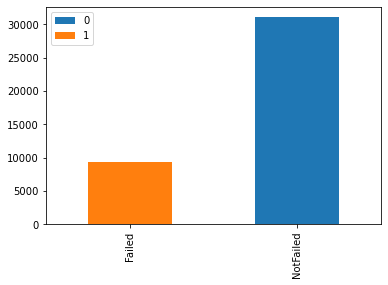

In [155]:
showChart('fail_7')
df_train['fail_7'].value_counts()

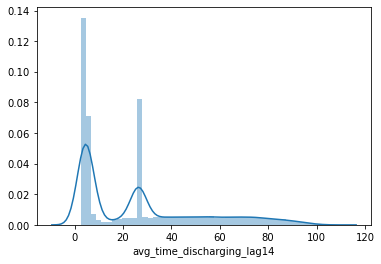

In [32]:
sns.distplot(df_train['avg_time_discharging_lag14'])
#Use mode

['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2', 'avg_time_charging_lag3', 'avg_time_charging_lag7', 'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1', 'avg_time_discharging_lag2', 'avg_time_discharging_lag3', 'avg_time_discharging_lag7', 'discharging_rate_lag3', 'discharging_rate_lag7', 'fail_7', 'avg_time_charging_lag4', 'avg_time_discharging_lag4', 'avg_time_charging_lag5', 'avg_time_discharging_lag5', 'avg_time_charging_lag6', 'avg_time_discharging_lag6', 'avg_time_charging_lag8', 'avg_time_discharging_lag8', 'avg_time_charging_lag9', 'avg_time_discharging_lag9', 'avg_time_charging_lag10', 'avg_time_discharging_lag10', 'avg_time_charging_lag11', 'avg_time_discharging_lag11', 'avg_time_charging_lag12', 'avg_time_discharging_lag12', 'avg_time_charging_lag13', 'avg_time_discharging_lag13', 'avg_time_charging_lag14', 'avg_time_discharging_lag14', 'discharging_rate_lag4', 'discharging_rate_lag5', 'discharging_rate_lag6', 'discharging_rate_lag8', 'ch

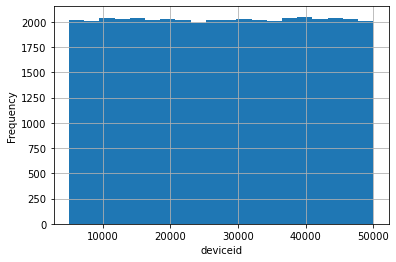

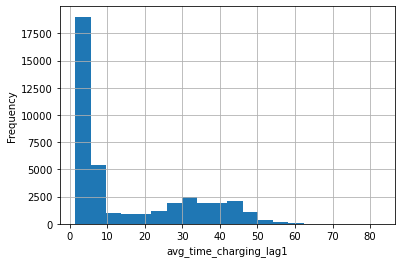

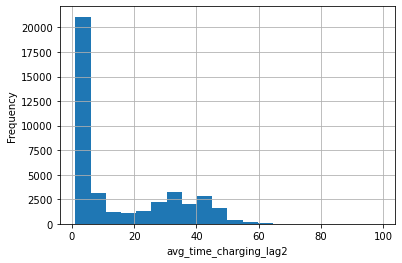

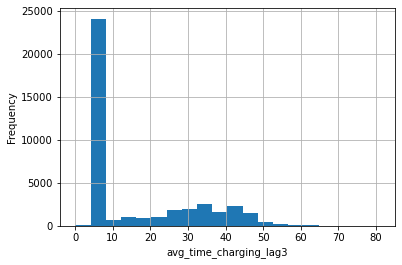

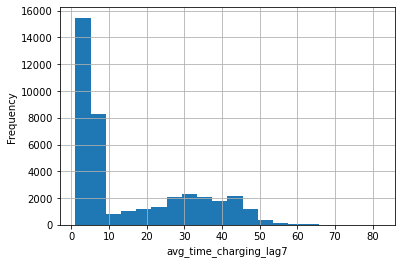

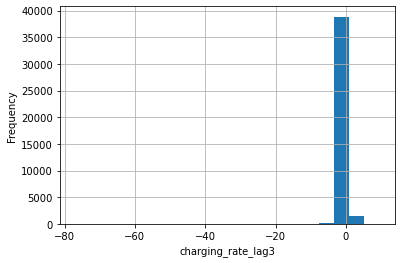

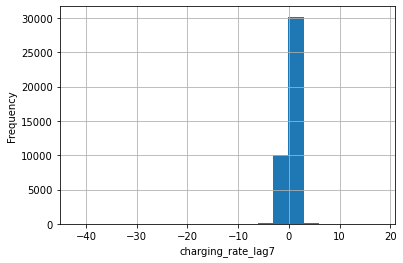

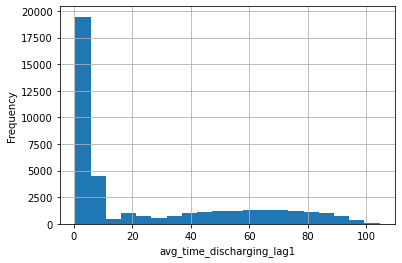

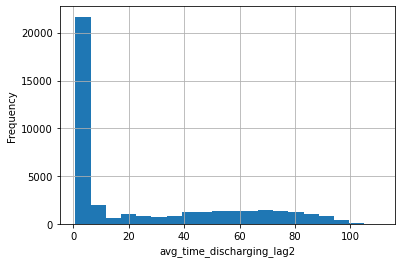

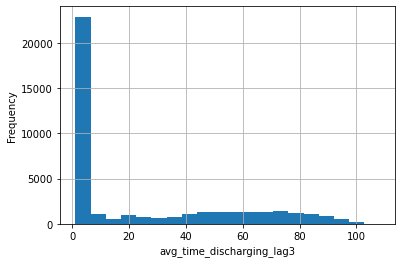

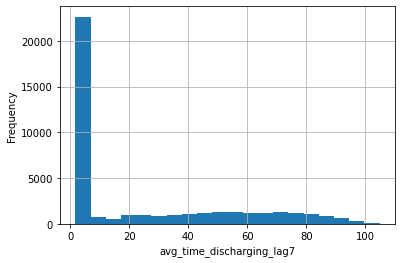

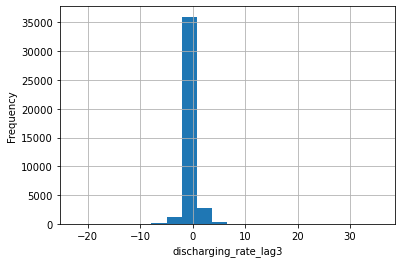

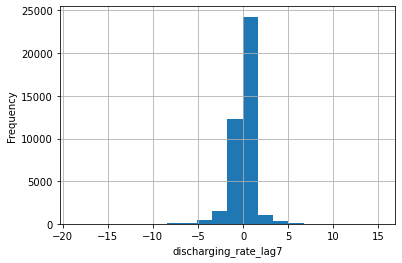

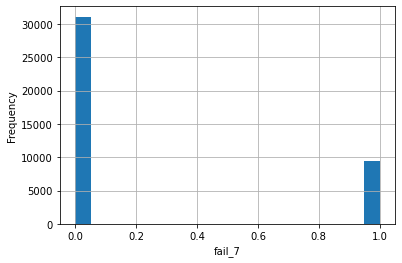

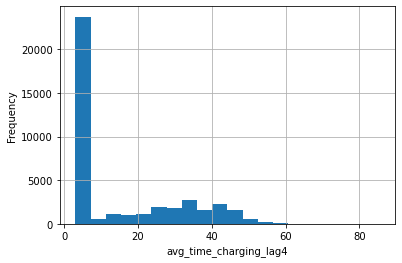

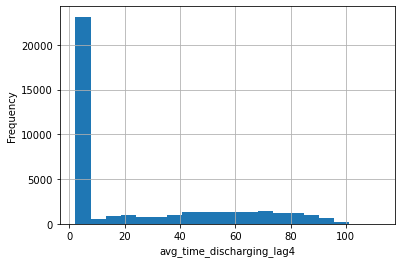

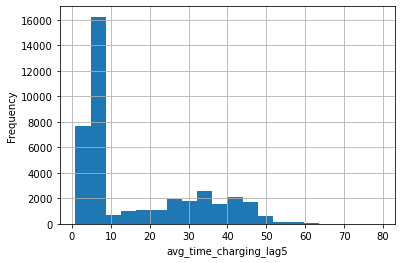

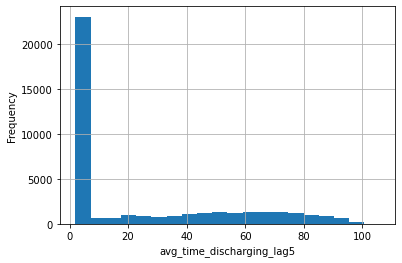

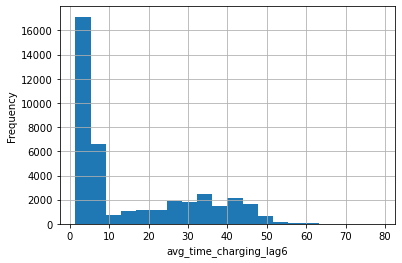

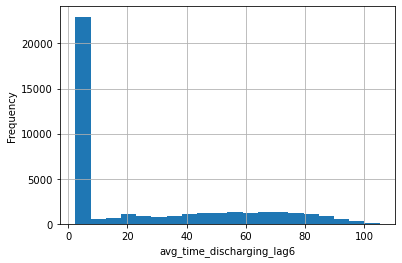

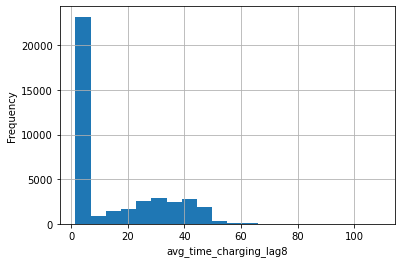

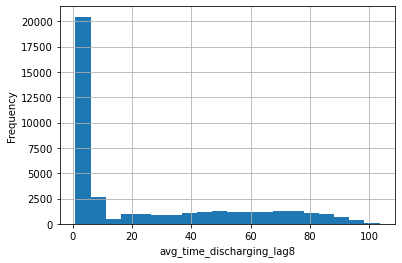

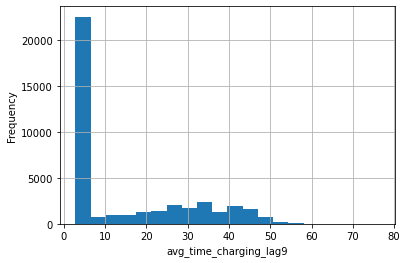

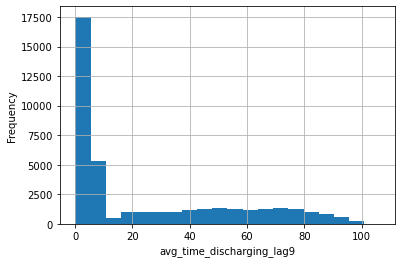

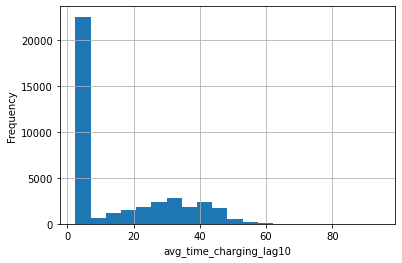

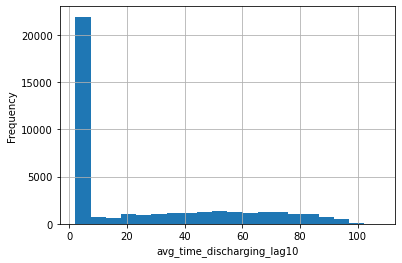

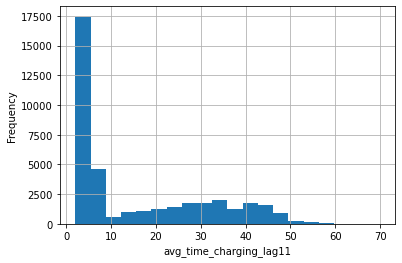

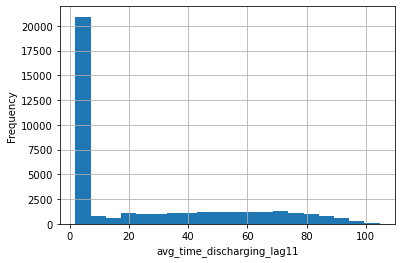

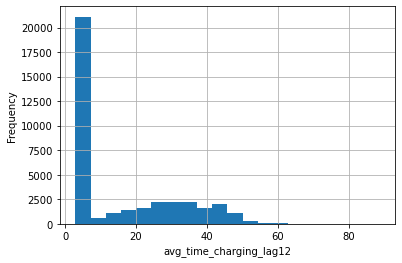

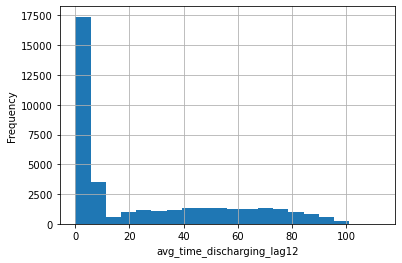

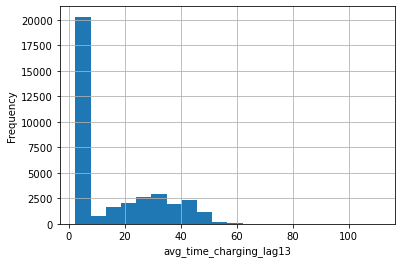

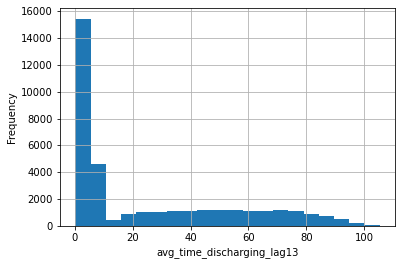

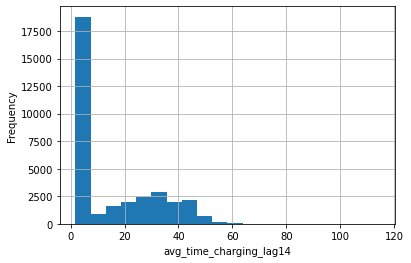

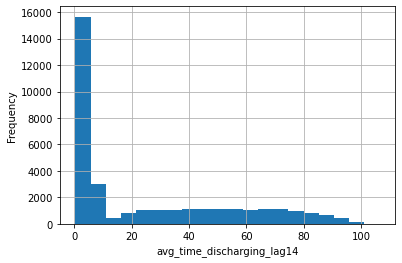

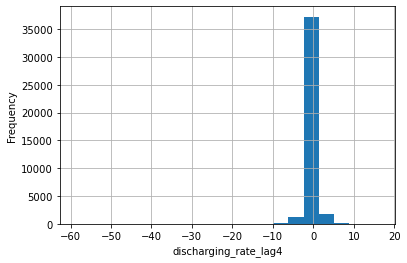

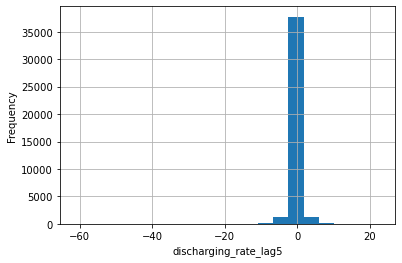

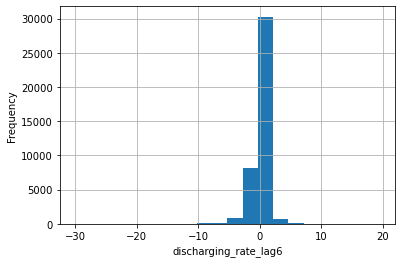

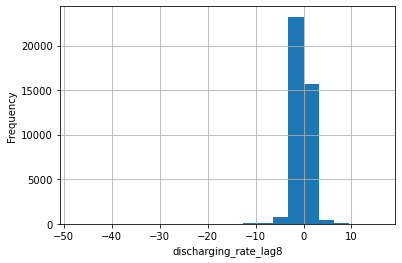

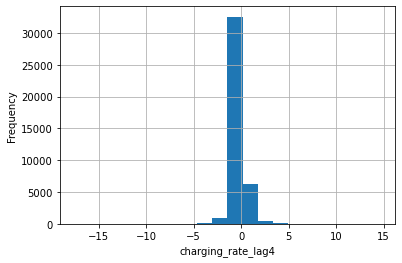

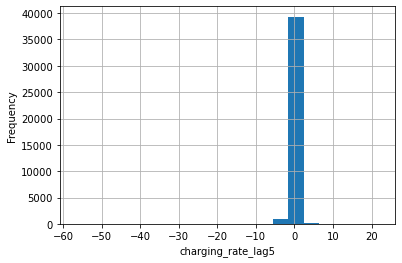

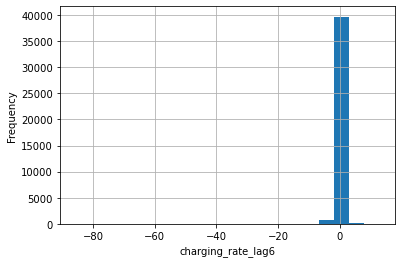

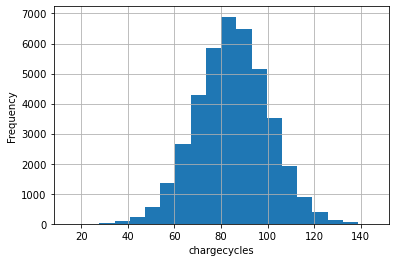

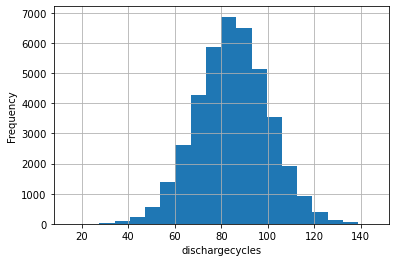

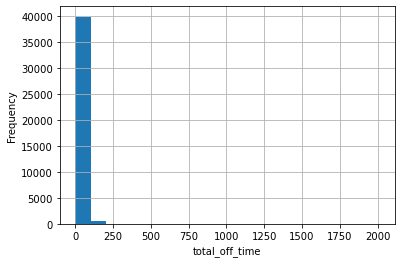

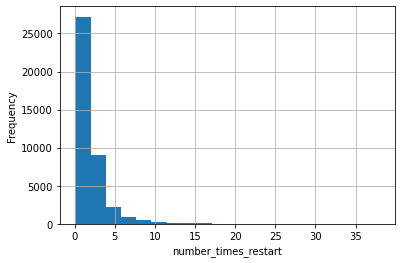

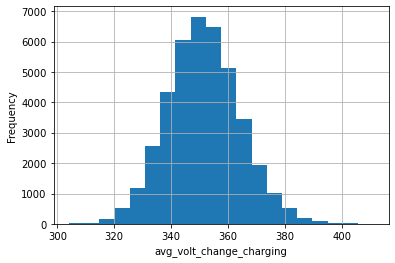

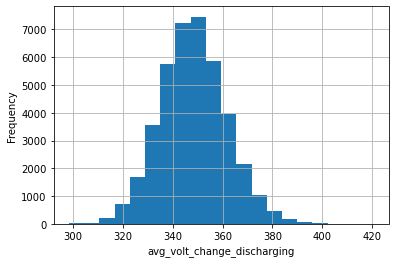

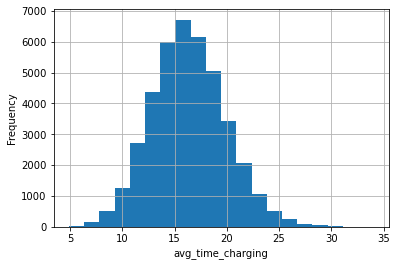

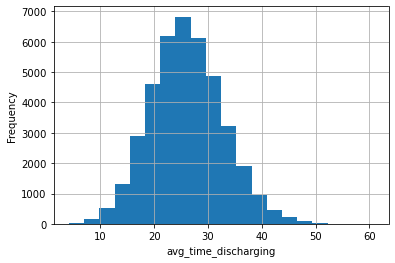

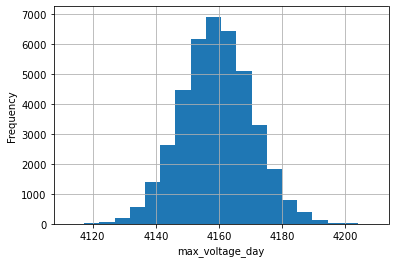

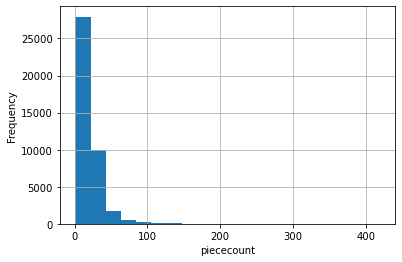

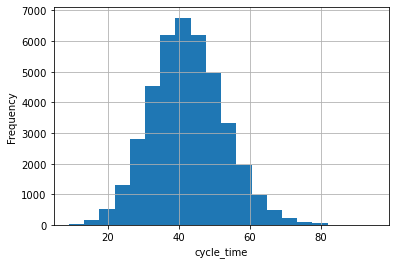

In [126]:
Num_cols=df_train.select_dtypes(include=np.number).columns.tolist()
print(Num_cols)
for i in Num_cols:
    df_train[i].hist(bins = 20)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

In [263]:
# Z-score function
# df_train['lag1']=stats.zscore(df_train['avg_time_charging_lag1'])
# df_train[['avg_time_charging_lag1','lag1']].describe().round(3)


avg_time_charging_lag1       lag1
count               40434.000  40434.000
mean                   16.192     -0.000
std                    15.248      1.000
min                     1.510     -0.963
25%                     4.910     -0.740
50%                     5.770     -0.684
75%                    29.950      0.902
max                    61.820      2.992

In [271]:
def find_outliers(col):
    z=np.abs(stats.zscore(col))
    idx_outliers=np.where(z>3, True,False)
    return pd.Series(idx_outliers,index=col.index)

idx=find_outliers(df_train['avg_time_charging_lag1'])
idx

0        False
1        False
2        False
3        False
4        False
         ...  
40495    False
40496    False
40497    False
40498    False
40499    False
Length: 40500, dtype: bool

In [272]:
display(df_train.loc[idx==True].describe().round(3))

deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
count     61.000                  61.000                  61.000   
mean   29241.246                  67.438                  17.442   
std    13261.084                   4.880                  17.297   
min     5445.000                  62.420                   4.480   
25%    18940.000                  63.670                   4.800   
50%    32803.000                  66.100                   5.650   
75%    38929.000                  68.840                  34.110   
max    49814.000                  82.550                  52.890   

       avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
count                  61.000                  61.000              61.000   
mean                   13.180                  15.543               0.018   
std                    13.628                  14.351               0.507   
min                     4.350                   4.530              -1.467   
25%                     4.820                   4.800              -0.050   
50%                     5.480                   5.610               0.007   
75%                    19.070                  28.130               0.067   
max                    53.070                  45.660               1.650   

       charging_rate_lag7  avg_time_discharging_lag1  \
count              61.000                     61.000   
mean               -0.128                     70.504   
std                 0.627                     10.454   
min                -1.580                     32.040   
25%                -0.180                     64.360   
50%                -0.007                     71.640   
75%                 0.123                     78.430   
max                 1.050                     87.020   

       avg_time_discharging_lag2  avg_time_discharging_lag3  ...  \
count                     61.000                     61.000  ...   
mean                      28.698                     19.511  ...   
std                       33.653                     26.351  ...   
min                        3.350                      3.360  ...   
25%                        4.120                      4.050  ...   
50%                        6.190                      5.110  ...   
75%                       56.660                     25.400  ...   
max                       95.320                     95.730  ...   

       dischargecycles  total_off_time  number_times_restart  \
count           61.000          61.000                61.000   
mean            79.301          27.494                 1.721   
std             13.684          24.884                 1.022   
min             41.812           0.000                 0.500   
25%             69.750           5.409                 1.000   
50%             82.320          20.833                 1.294   
75%             88.824          46.000                 2.118   
max            103.389          94.286                 4.562   

       avg_volt_change_charging  avg_volt_change_discharging  \
count                    61.000                       61.000   
mean                    347.633                      344.276   
std                      11.078                       11.953   
min                     320.714                      313.821   
25%                     340.391                      334.999   
50%                     348.674                      345.098   
75%                     354.901                      352.002   
max                     372.081                      375.536   

       avg_time_charging  avg_time_discharging  max_voltage_day  piececount  \
count             61.000                61.000           61.000      61.000   
mean              19.526                29.307         4154.903      20.084   
std                3.667                 7.052           10.791      12.526   
min               13.444                18.721         4127.474       5.857   
25%               17.055          

In [273]:
display(df_train.loc[idx==False].describe().round(3))
df_train=df_train.loc[idx==False]

deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
count  40439.000               40439.000               40439.000   
mean   27508.547                  16.198                  16.520   
std    12992.232                  15.256                  15.423   
min     5000.000                   1.510                   1.060   
25%    16233.500                   4.910                   4.920   
50%    27522.000                   5.770                   5.830   
75%    38784.500                  29.955                  30.725   
max    49999.000                  62.280                  98.890   

       avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
count               40439.000               40373.000           40439.000   
mean                   16.282                  16.356              -0.043   
std                    15.307                  15.139               0.777   
min                     0.040                   1.070             -76.947   
25%                     4.900                   4.900              -0.067   
50%                     5.780                   5.780               0.000   
75%                    30.070                  29.600               0.047   
max                    81.000                  81.890               9.557   

       charging_rate_lag7  avg_time_discharging_lag1  \
count           40427.000                  40439.000   
mean               -0.053                     25.733   
std                 0.757                     29.212   
min               -42.130                      0.520   
25%                -0.100                      4.200   
50%                -0.003                      5.860   
75%                 0.060                     50.005   
max                17.913                    104.550   

       avg_time_discharging_lag2  avg_time_discharging_lag3  ...  \
count                  40439.000                  40439.000  ...   
mean                      26.350                     25.913  ...   
std                       29.453                     29.273  ...   
min                        0.700                      1.070  ...   
25%                        4.210                      4.200  ...   
50%                        5.920                      5.850  ...   
75%                       51.210                     50.325  ...   
max                      110.560                    108.170  ...   

       dischargecycles  total_off_time  number_times_restart  \
count        40439.000       40439.000             40439.000   
mean            84.867          25.256                 2.156   
std             15.509          37.052                 2.225   
min             14.417           0.000                 0.091   
25%             74.521           3.562                 1.054   
50%             84.885          17.095                 1.471   
75%             95.212          37.000                 2.356   
max            145.333        2013.000                38.000   

       avg_volt_change_charging  avg_volt_change_discharging  \
count                 40439.000                    40439.000   
mean                    351.427                      348.214   
std                      12.747                       13.279   
min                     304.051                      298.250   
25%                     342.773                      339.271   
50%                     351.114                      347.915   
75%                     359.691                      356.844   
max                     410.958                      420.486   

       avg_time_charging  avg_time_discharging  max_voltage_day  piececount  \
count          40439.000             40439.000        40439.000   40439.000   
mean              16.348                26.077         4159.273      20.527   
std                3.551                 6.812           11.306      16.467   
min                4.890                 4.131         4112.455       1.000   
25%               13.910          

In [274]:
df_outliers=pd.DataFrame()
for col in df_train.describe().columns:
    df_outliers[col]=find_outliers(df_train[col])
df_outliers.head()



<ipython-input-271-d1693bc48f8c>:3: RuntimeWarning: invalid value encountered in greater
  idx_outliers=np.where(z>3, True,False)


deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
0     False                   False                   False   
1     False                   False                   False   
2     False                   False                   False   
3     False                   False                   False   
4     False                   False                   False   

   avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
0                   False                   False               False   
1                   False                   False               False   
2                   False                   False               False   
3                   False                   False               False   
4                   False                   False               False   

   charging_rate_lag7  avg_time_discharging_lag1  avg_time_discharging_lag2  \
0               False                      False                      False   
1               False                      False                      False   
2               False                      False                      False   
3               False                      False                      False   
4               False                      False                      False   

   avg_time_discharging_lag3  ...  dischargecycles  total_off_time  \
0                      False  ...            False           False   
1                      False  ...            False           False   
2                      False  ...            False           False   
3                      False  ...            False           False   
4                      False  ...            False           False   

   number_times_restart  avg_volt_change_charging  \
0                 False                     False   
1                 False                     False   
2                 False                     False   
3                 False                     False   
4                 False                     False   

   avg_volt_change_discharging  avg_time_charging  avg_time_discharging  \
0                        False              False                 False   
1                        False              False                 False   
2                        False              False                 False   
3                        False              False                 False   
4                        False              False                 False   

   max_voltage_day  piececount  cycle_time  
0            False       False       False  
1            False       False       False  
2            False       False       False  
3            False       False       False  
4            False       False       False  

[5 rows x 52 columns]

In [275]:
test_outs=df_outliers.apply(lambda x:np.any(x),axis=1)
print(len(test_outs),df_outliers.shape)
test_outs

40439 (40439, 52)


0        False
1         True
2        False
3        False
4        False
         ...  
40495     True
40496    False
40497    False
40498    False
40499    False
Length: 40439, dtype: bool

In [277]:
np.sum(test_outs)

5547

In [278]:
df_clean=df_train.loc[idx==False]
df_clean.describe

<bound method NDFrame.describe of        deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
0         28647                    5.12                   41.11   
1         36175                   36.60                    5.16   
2         16107                    5.51                    5.04   
3         27362                    4.66                   39.85   
4         19463                    5.10                   43.24   
...         ...                     ...                     ...   
40495     16284                    4.97                    5.81   
40496     49732                    4.81                    4.53   
40497     43158                    4.73                    4.77   
40498      5860                    4.93                    5.01   
40499     20795                   30.83                    5.18   

       avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
0                        6.56                   25.39            0.086667   
1      

In [ ]:
# USING IQR

In [279]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

deviceid                       22551.000000
avg_time_charging_lag1            25.045000
avg_time_charging_lag2            25.805000
avg_time_charging_lag3            25.170000
avg_time_charging_lag7            24.700000
charging_rate_lag3                 0.113333
charging_rate_lag7                 0.160000
avg_time_discharging_lag1         45.805000
avg_time_discharging_lag2         47.000000
avg_time_discharging_lag3         46.125000
avg_time_discharging_lag7         45.490000
discharging_rate_lag3              0.293333
discharging_rate_lag7              0.346667
fail_7                             0.000000
charge_cycle_time_below_12         1.000000
avg_time_charging_lag4            25.000000
avg_time_discharging_lag4         46.110000
avg_time_charging_lag5            25.010000
avg_time_discharging_lag5         46.042500
avg_time_charging_lag6            24.835000
avg_time_discharging_lag6         45.680000
avg_time_charging_lag8            24.540000
avg_time_discharging_lag8       

In [280]:
print(df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))

       Date Deployed  LastRecord  avg_time_charging  avg_time_charging_lag1  \
0              False       False              False                   False   
1              False       False              False                   False   
2              False       False              False                   False   
3              False       False              False                   False   
4              False       False              False                   False   
...              ...         ...                ...                     ...   
40495          False       False              False                   False   
40496          False       False              False                   False   
40497          False       False              False                   False   
40498          False       False              False                   False   
40499          False       False              False                   False   

       avg_time_charging_lag10  avg_time_charging_l

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [281]:
df_trainclean = df_train[~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
df_trainclean.shape

(1640, 55)

In [282]:
# An outlier is outside 1.5 * the IQR experimental analysis has shown that a higher/lower IQR might produce more accurate results. 

def removeOutliers(x, outlierConstant):
    a = np.array(x)
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for y in a.tolist():
        if y >= quartileSet[0] and y <= quartileSet[1]:
            resultList.append(y)
    return resultList


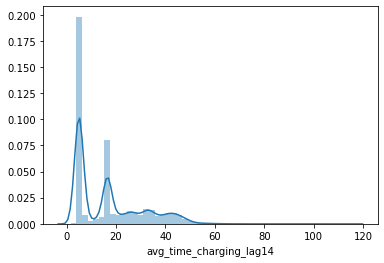

In [62]:
sns.distplot(df_train['avg_time_charging_lag14'])
#Use Mode

In [21]:
groupa=['avg_time_charging_lag7','charging_rate_lag7','avg_time_discharging_lag7','discharging_rate_lag7',
        'avg_time_charging_lag5','avg_time_discharging_lag5','avg_time_charging_lag6','avg_time_discharging_lag6',
        'avg_time_charging_lag8','avg_time_discharging_lag8','avg_time_charging_lag9','avg_time_discharging_lag9',
        'avg_time_charging_lag10','avg_time_discharging_lag10','avg_time_charging_lag11','avg_time_discharging_lag11',
        'avg_time_charging_lag12','avg_time_discharging_lag12','avg_time_charging_lag13','avg_time_discharging_lag13',
        'avg_time_charging_lag14','avg_time_discharging_lag14','discharging_rate_lag6','discharging_rate_lag8',
        'charging_rate_lag6']
df_train[groupa] = df_train[groupa].fillna(value=df_train[groupa].mean())

In [22]:
groupb=['avg_time_charging_lag7','charging_rate_lag7','avg_time_discharging_lag7','discharging_rate_lag7',
        'avg_time_charging_lag5','avg_time_discharging_lag5','avg_time_charging_lag6','avg_time_discharging_lag6',
        'avg_time_charging_lag8','avg_time_discharging_lag8','avg_time_charging_lag9','avg_time_discharging_lag9',
        'avg_time_charging_lag10','avg_time_discharging_lag10','avg_time_charging_lag11','avg_time_discharging_lag11',
        'avg_time_charging_lag12','avg_time_discharging_lag12','avg_time_charging_lag13','avg_time_discharging_lag13',
        'avg_time_charging_lag14','avg_time_discharging_lag14','discharging_rate_lag8']
df_test[groupb] = df_test[groupb].fillna(value=df_test[groupb].mean())

In [23]:
print(df_train.isna().sum())


deviceid                       0
avg_time_charging_lag1         0
avg_time_charging_lag2         0
avg_time_charging_lag3         0
avg_time_charging_lag7         0
charging_rate_lag3             0
charging_rate_lag7             0
avg_time_discharging_lag1      0
avg_time_discharging_lag2      0
avg_time_discharging_lag3      0
avg_time_discharging_lag7      0
discharging_rate_lag3          0
discharging_rate_lag7          0
fail_7                         0
charge_cycle_time_below_12     0
avg_time_charging_lag4         0
avg_time_discharging_lag4      0
avg_time_charging_lag5         0
avg_time_discharging_lag5      0
avg_time_charging_lag6         0
avg_time_discharging_lag6      0
avg_time_charging_lag8         0
avg_time_discharging_lag8      0
avg_time_charging_lag9         0
avg_time_discharging_lag9      0
avg_time_charging_lag10        0
avg_time_discharging_lag10     0
avg_time_charging_lag11        0
avg_time_discharging_lag11     0
avg_time_charging_lag12        0
avg_time_d

In [24]:
print(df_test.isna().sum())

deviceid                       0
avg_time_charging_lag1         0
avg_time_charging_lag2         0
avg_time_charging_lag3         0
avg_time_charging_lag7         0
charging_rate_lag3             0
charging_rate_lag7             0
avg_time_discharging_lag1      0
avg_time_discharging_lag2      0
avg_time_discharging_lag3      0
avg_time_discharging_lag7      0
discharging_rate_lag3          0
discharging_rate_lag7          0
charge_cycle_time_below_12     0
avg_time_charging_lag4         0
avg_time_discharging_lag4      0
avg_time_charging_lag5         0
avg_time_discharging_lag5      0
avg_time_charging_lag6         0
avg_time_discharging_lag6      0
avg_time_charging_lag8         0
avg_time_discharging_lag8      0
avg_time_charging_lag9         0
avg_time_discharging_lag9      0
avg_time_charging_lag10        0
avg_time_discharging_lag10     0
avg_time_charging_lag11        0
avg_time_discharging_lag11     0
avg_time_charging_lag12        0
avg_time_discharging_lag12     0
avg_time_c

In [261]:
df_train.head(10)

deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
0     28647                    5.12                   41.11   
1     36175                   36.60                    5.16   
2     16107                    5.51                    5.04   
3     27362                    4.66                   39.85   
4     19463                    5.10                   43.24   
5     30054                   27.74                    5.12   
6     26431                    4.67                    5.32   
7      5491                   11.49                    7.10   
8     43953                   35.88                   46.05   
9     45081                    4.80                   41.35   

   avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
0                    6.56                   25.39            0.086667   
1                    6.23                    6.96            0.136667   
2                    4.52                    5.96           -0.460000   
3                   35.76                   40.69            0.076667   
4                    4.63                    5.26            0.040000   
5                   42.39                    5.46            0.076667   
6                   23.99                    4.62            0.270000   
7                   18.48                     NaN           -0.650000   
8                    5.43                    4.77            0.830000   
9                    6.09                   27.60           -0.003333   

   charging_rate_lag7  avg_time_discharging_lag1  avg_time_discharging_lag2  \
0           -0.006667                       4.37                      91.70   
1           -1.296667                      62.67                       6.53   
2           -0.083333                       5.13                       5.65   
3           -0.006667                       3.93                      76.37   
4           -0.153333                       4.69                      71.44   
5           -0.020000                      45.90                       3.99   
6           -0.010000                       3.56                       4.62   
7            0.063333                      18.21                      10.88   
8           -2.486667                      47.08                      85.63   
9            0.000000                       3.41                      75.23   

   avg_time_discharging_lag3  ...  avg_volt_change_charging  \
0                      15.70  ...                377.080000   
1                       6.16  ...                350.517857   
2                       4.14  ...                346.113333   
3                      60.86  ...                356.184211   
4                       3.80  ...                370.904000   
5                      75.64  ...                350.345500   
6                      18.57  ...                358.789130   
7                      23.40  ...                345.727143   
8                       6.50  ...                330.151429   
9                       8.67  ...                356.720952   

   avg_volt_change_discharging  avg_time_charging  avg_time_discharging  \
0                   367.428750          21.696250             39.005000   
1                   350.309286          19.883571             32.213571   
2                   343.409524          13.675238             20.471429   
3                   349.844737          16.306842             26.189474   
4                   367.730000          18.797333             30.812000   
5                   346.747500          12.878500             19.621000   
6                   353.025652          17.384783             27.495217   
7                   342.172857          19.920000             34.582857   
8                   332.997857          18.780714             30.125000   
9                   348.738571          16.782381             26.645238   

   max_voltage_day  piececount  cycle_time  LastRecord  Date Deployed  \
0      4174.875000   14.200000   60.701250